<a href="https://colab.research.google.com/github/DaveMatNat/fake-review/blob/main/Fake_Review_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data and Modules Import**

In [ ]:
def link_conv(url):
  return 'https://drive.google.com/uc?id=' + url.split('/')[-2]

In [ ]:
import pandas as pd
dataset = link_conv("https://drive.google.com/file/d/1gVVq3GvBWkXTluQyTCpCleD_bW-UrIPs/view?usp=sharing")
df = pd.read_csv(dataset)
df.head()

,category,rating,label,text_
0,Home and Kitchen,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home and Kitchen,5,CG,"love it, a great upgrade from the original. I..."
2,Home and Kitchen,5,CG,This pillow saved my back. I love the look and...
3,Home and Kitchen,1,CG,"Missing information on how to use it, but it i..."
4,Home and Kitchen,5,CG,Very nice set. Good quality. We have had the s...


In [ ]:
import nltk
from nltk.tokenize import (TreebankWordTokenizer,word_tokenize,wordpunct_tokenize,TweetTokenizer,MWETokenizer)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df["text_"]

,text_
0,"Love this! Well made, sturdy, and very comfor..."
1,"love it, a great upgrade from the original. I..."
2,This pillow saved my back. I love the look and...
3,"Missing information on how to use it, but it i..."
4,Very nice set. Good quality. We have had the s...
...,...
40427,I had read some reviews saying that this bra r...
40428,I wasn't sure exactly what it would be. It is ...
40429,"You can wear the hood by itself, wear it with ..."
40430,I liked nothing about this dress. The only rea...


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.shape

(40432, 4)

In [ ]:
df = df.astype({"rating": str})

In [ ]:
NumbersOfRows = 40432

df = df.sample(n = NumbersOfRows)
df['combined'] = df['category'] + df['rating'] + df['text_']
df

,category,rating,label,text_,combined
21568,Per Supplies,5,CG,Our 10yr old lab/pit mix (Cats) has a sensitiv...,Per Supplies5Our 10yr old lab/pit mix (Cats) h...
14877,Movies and TV,5,OR,What a great little movie. I had never heard ...,Movies and TV5What a great little movie. I ha...
19960,Per Supplies,1,CG,Overrated and a waste of money. The only reaso...,Per Supplies1Overrated and a waste of money. T...
5294,Sports and Outdoors,5,OR,Runs small. I'm normally a medium and I had to...,Sports and Outdoors5Runs small. I'm normally a...
2819,Home and Kitchen,1,CG,"I'm missing 3 trays from this set, the first o...",Home and Kitchen1I'm missing 3 trays from this...
...,...,...,...,...,...
34767,Toys and Games,5,OR,I'll be honest. I didn't buy it to build what ...,Toys and Games5I'll be honest. I didn't buy it...
35931,Toys and Games,5,CG,Bought these for our holiday party. The pieces...,Toys and Games5Bought these for our holiday pa...
36560,Toys and Games,4,CG,Beautiful eyes; Pretty doll in perfect conditi...,Toys and Games4Beautiful eyes; Pretty doll in ...
35013,Toys and Games,1,CG,Total junk. The magnet is not strong enough to...,Toys and Games1Total junk. The magnet is not s...


# **Code**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vec = CountVectorizer(tokenizer=word_tokenize)
tfidf = TfidfTransformer()

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

nltk.download('punkt_tab') # added to download the missing resource

def extract(x):
    global count_vec, tfidf
    count_vec = CountVectorizer(tokenizer=word_tokenize)
    count_vec.fit(x)
    xvec = count_vec.transform(x)
    tfidf = TfidfTransformer()
    tfidf.fit(xvec)
    Xtfidf = tfidf.transform(xvec) # changed fit_transform to transform since fit was already called
    return Xtfidf

X = extract(df["combined"])
y = df["label"]
X.shape, y.shape

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((40432, 58370), (40432,))

# **Train**

In [ ]:

from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
svm = svm.SVC()
KNN = neighbors.KNeighborsClassifier()
SGD = linear_model.SGDClassifier()
SVC = LinearSVC()


Classifier = svm


Xtrain, Xtest , ytrain, ytest = train_test_split(X,y, train_size=0.8)
Classifier.fit(Xtrain, ytrain)

SVC()

# **Report**

In [ ]:
from sklearn.metrics import classification_report
y_predict = Classifier.predict(Xtest)
print(classification_report(ytest , y_predict))

              precision    recall  f1-score   support

          CG       0.95      0.91      0.93      4059
          OR       0.92      0.95      0.93      4028

    accuracy                           0.93      8087
   macro avg       0.93      0.93      0.93      8087
weighted avg       0.93      0.93      0.93      8087



              precision    recall  f1-score   support

        Fake       0.95      0.91      0.93      4059
        Real       0.92      0.95      0.93      4028

    accuracy                           0.93      8087
   macro avg       0.93      0.93      0.93      8087
weighted avg       0.93      0.93      0.93      8087



[Text(0, 0.5, 'Fake'), Text(0, 1.5, 'Real')]

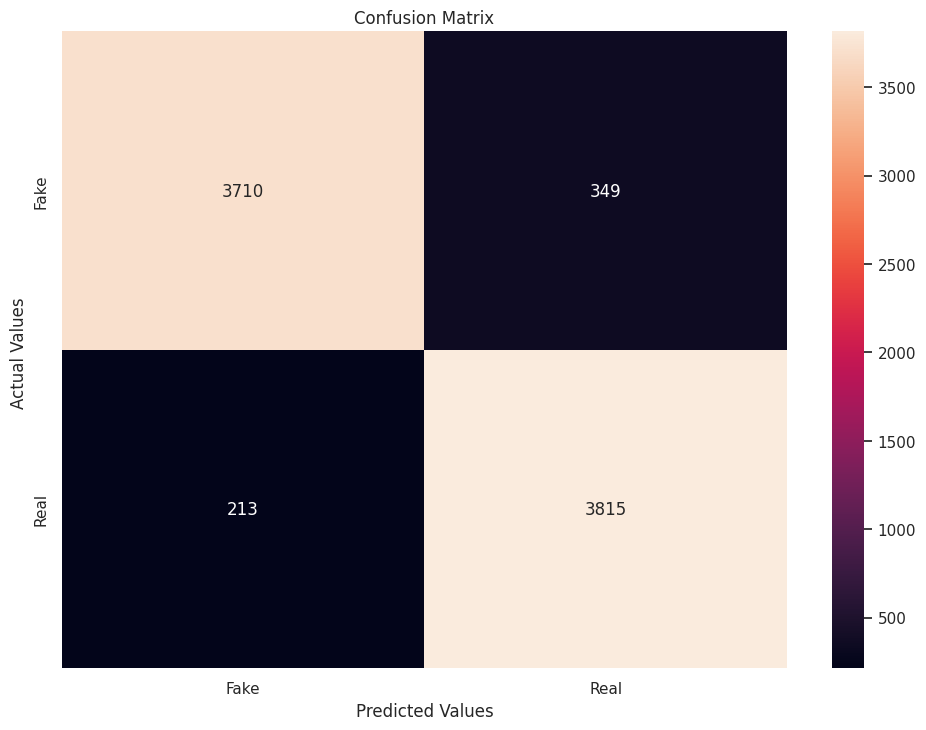

In [ ]:
from sklearn.metrics import classification_report
clss = ['Fake','Real']

classreport = classification_report(ytest ,y_predict, target_names=clss )
print(classreport)

import seaborn as sb
from sklearn.metrics import confusion_matrix
sb.set(rc={'figure.figsize':(11.7,8.27)})
cf = confusion_matrix(ytest , y_predict)
plt = sb.heatmap(cf, annot=True,fmt='g')
plt.set_title('Confusion Matrix');
plt.set_xlabel('Predicted Values')
plt.set_ylabel('Actual Values ')

plt.xaxis.set_ticklabels(clss)
plt.yaxis.set_ticklabels(clss)

# **Test**

In [ ]:
def predict(x):
    xvec = count_vec.transform(x)
    tfidf.fit(xvec)
    Xtfidf = tfidf.transform(xvec)
    r = Classifier.predict(Xtfidf)
    return r

Text = str(input("Text: "))
xtest1 = [Text]
if predict(xtest1) == ["CG"]:
  print("Fake")
elif predict(xtest1) == ["OR"]:
  print("Real")

Text: I was skeptical at first, but WOW—this product completely exceeded my expectations. I’ve been using the “TimeWizard 3000” Desk Organizer for a month now, and my productivity has skyrocketed.  It’s not just an organizer; it’s a life-changer. The built-in timer and motivational quotes feature keep me focused, and the charging dock is a game-changer for my cluttered workspace. Plus, the sleek design adds a professional touch to my desk—my coworkers keep asking where I got it!  Highly recommend this to anyone who struggles with staying organized or just wants to take their workflow to the next level. If I could give it 10 stars, I would. Well worth the price!
Fake


In [ ]:
import pickle
modelname = 'FakeReviewModel.pkl'
pickle.dump(svm, open(modelname, 'wb'))
vectorname = 'count_vec.pkl'
pickle.dump(count_vec, open(vectorname, 'wb'))